In [1]:
#Root 경로로 이동
%cd ..

d:\MyGit\BrainMR_MCI


https://towardsdatascience.com/medical-image-pre-processing-with-python-d07694852606

In [11]:
import dataloader
import pandas as pd
import utils
import numpy as np

In [3]:
config = utils.load_config()

In [4]:
df_dataset = pd.read_csv(config['PATH_DATASET_CSV'])
df_dataset = df_dataset.dropna()
img_dataset = dataloader.load_dataset(df_dataset[:1])

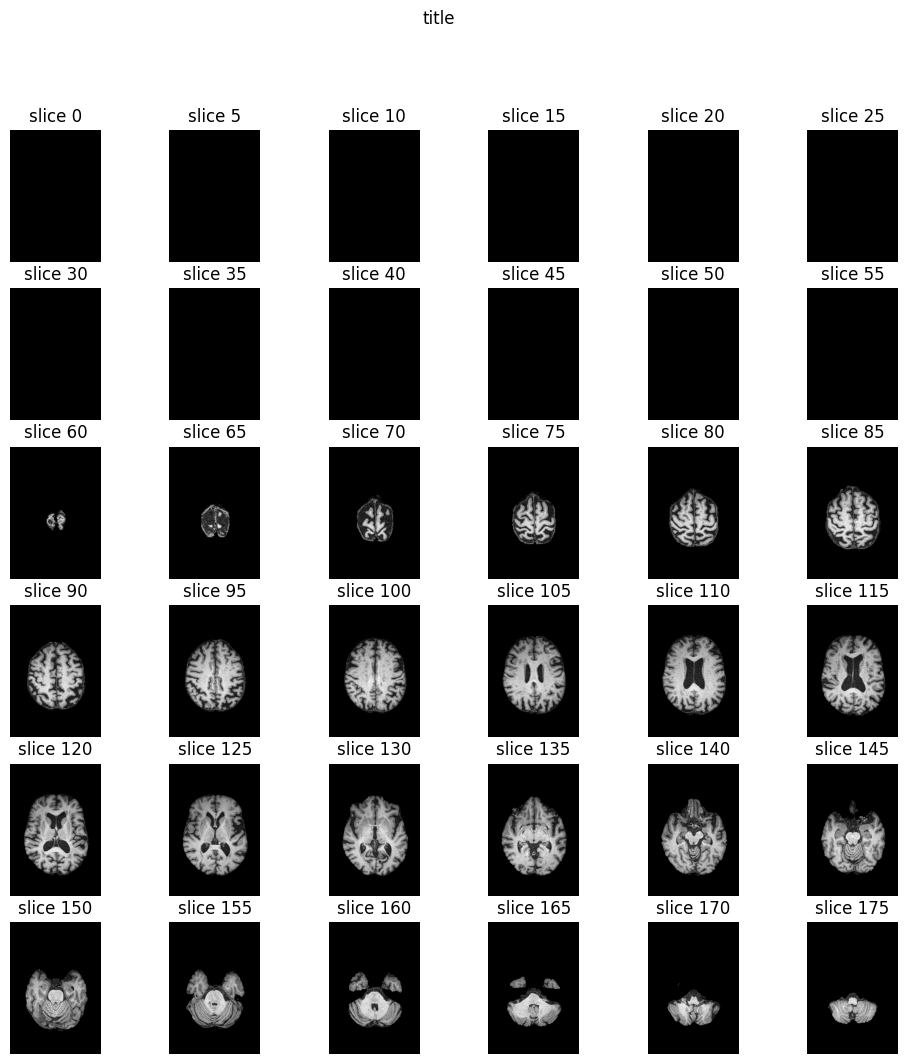

In [5]:
utils.stack_plot(img_dataset[0])

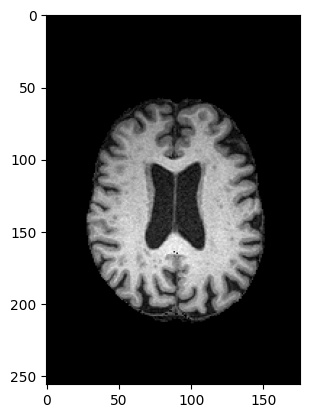

In [10]:
#image crop
sample_image = img_dataset[0][:,:,110]
utils.image_plot(sample_image)

In [43]:
def crop_image(image, display=False):
    # Create a mask with the background pixels
    mask = image == 0
    # Find the brain area
    coords = np.array(np.nonzero(~mask))
    top_left = np.min(coords, axis=1)
    bottom_right = np.max(coords, axis=1)
    print(top_left[0],top_left[1])
    print(bottom_right[0],bottom_right[1])
    # Remove the background
    croped_image = image[top_left[0]:bottom_right[0],top_left[1]:bottom_right[1]]
    
    return croped_image

4 0
255 175
(256, 176)
(251, 175)


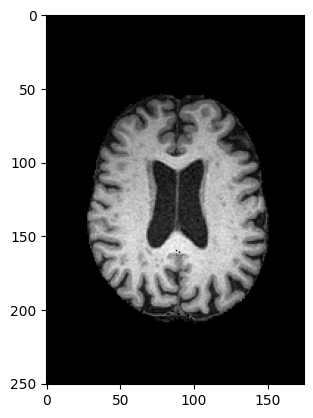

In [44]:
#image crop
sample_image = img_dataset[0][:,:,110]
sample_image_pre = crop_image(sample_image)
print(sample_image.shape)
print(sample_image_pre.shape)
utils.image_plot(sample_image_pre)